In [ ]:
!pip install kaggle -q

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d shivamtaneja2304/inshorts-dataset-english

Dataset URL: https://www.kaggle.com/datasets/shivamtaneja2304/inshorts-dataset-english
License(s): Apache 2.0
 91% 38.0M/41.9M [00:01<00:00, 31.4MB/s]
100% 41.9M/41.9M [00:02<00:00, 21.5MB/s]


In [ ]:
!unzip /content/inshorts-dataset-english.zip

Archive:  /content/inshorts-dataset-english.zip
replace english_news_dataset.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/english_news_dataset.csv')

df.head()

,Headline,Content,News Categories,Date
0,Congress leader Baljinder Singh shot dead at h...,Congress leader Baljinder Singh was shot dead ...,['national'],19-09-2023
1,17-year-old girl preparing for NEET dies by su...,Another NEET aspirant died by suicide in Rajas...,['national'],19-09-2023
2,Hampers to welcome MPs in new Parliament tomor...,In order to mark the first-ever working day of...,['national'],19-09-2023
3,"Only 10% women lawmakers in RS, while only 14%...","Congress President Mallikarjun Kharge, while s...",['national'],19-09-2023
4,"Ganesh temple decorated with notes, coins wort...",The Sri Sathya Ganapathi Temple in Bengaluru a...,['national'],19-09-2023


In [ ]:
df.sample(5)

,Headline,Content,News Categories,Date
176261,Police crackdown on deadly 'manja' sales post ...,"On Sunday, within the jurisdiction of Kherwadi...",['miscellaneous'],2024-01-01
245574,Popular eyebrow treatment leads to lung diseas...,Two women were left with a lung disease after ...,['Health___Fitness'],2024-05-04
227365,AI to reshape tech like Spotify changed the mu...,Chief Justice DY Chandrachud said AI will resh...,['technology'],2024-04-15
240935,Pran Pratishtha of Sita's idol at Seetha Amman...,After the consecration (pran pratishtha) cerem...,"['miscellaneous', 'Lifestyle']",2024-04-28
270368,Delhi heatwave death: Why do high-temperatures...,A 40-year-old migrant labourer from Bihar died...,['Health___Fitness'],2024-06-01


In [ ]:
df.shape


(276663, 4)

In [ ]:
threshold = 10

# Identify classes with fewer instances
class_counts = df['News Categories'].value_counts()
rare_classes = class_counts[class_counts < threshold].index

# Group rare classes into a broader category 'Other'
df['category_grouped'] = df['News Categories'].apply(lambda x: 'Other' if x in rare_classes else x)

In [ ]:
df['category_grouped'].unique().size

668

In [ ]:
print(df.isna().any())

df[df['Headline'].isna()]

Headline            False
Content             False
News Categories     False
Date                False
category_grouped    False
dtype: bool


,Headline,Content,News Categories,Date,category_grouped


In [ ]:
df['category_grouped'].value_counts()

category_grouped
['entertainment']                                                         15094
['miscellaneous']                                                         12794
['science']                                                               11361
['sports']                                                                10306
['politics', 'national']                                                  10296
                                                                          ...  
['EXPLAINERS', 'entertainment', 'technology']                                10
['politics', 'world', 'miscellaneous', 'technology']                         10
['EXPLAINERS', 'world', 'education']                                         10
['Feel_Good_Stories', 'miscellaneous', 'business', 'Health___Fitness']       10
['Feel_Good_Stories', 'hatke', 'miscellaneous', 'national', 'travel']        10
Name: count, Length: 668, dtype: int64

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, "['entertainment']"),
  Text(1, 0, "['miscellaneous']"),
  Text(2, 0, "['science']"),
  Text(3, 0, "['sports']"),
  Text(4, 0, "['politics', 'national']"),
  Text(5, 0, "['business']")])

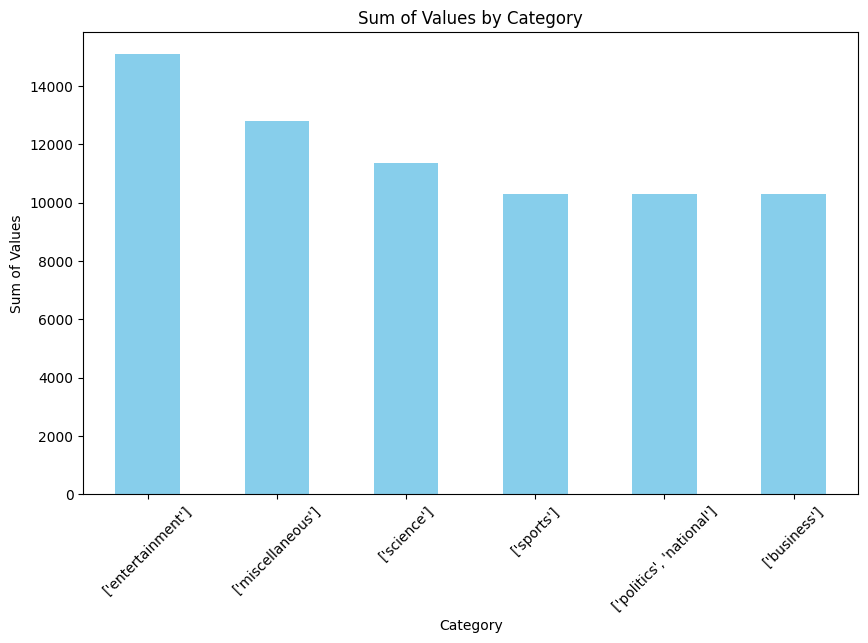

In [ ]:
grouped_data = df.groupby('category_grouped')['Content'].count()

# Get the top 5 categories by frequency
top_5_categories = grouped_data.nlargest(6)

# Plot the top 5 categories
fig, ax = plt.subplots(figsize=(10, 6))
top_5_categories.plot(kind='bar', color='skyblue',width=0.5)

plt.title('Sum of Values by Category')
plt.xlabel('Category')
plt.ylabel('Sum of Values')
plt.xticks(rotation=45)

In [ ]:
df.duplicated().sum()

47991

In [ ]:

df = df.drop_duplicates()

# Reset the index
df = df.reset_index(drop=True)

In [ ]:


# Group by category and count the occurrences
category_counts = df.groupby('category_grouped')['Content'].count()

#  Sort the counts in descending order and get the top 37 categories
top_categories = category_counts.nlargest(37)

#  Extract the category names as a list
category_names = top_categories.index.tolist()

print(category_names)


["['entertainment']", "['miscellaneous']", "['science']", "['sports']", "['business']", "['national']", "['automobile', 'business']", "['entertainment', 'fashion']", "['politics']", "['world']", "['politics', 'national']", "['education']", "['technology']", "['startup']", "['education', 'national']", "['Health___Fitness']", "['travel']", "['national', 'travel']", "['fashion']", "['business', 'startup']", "['business', 'technology']", "['business', 'startup', 'technology']", "['science', 'Health___Fitness']", "['sports', 'ODI_World_Cup_2023']", "['world', 'national']", "['national', 'Health___Fitness']", "['world', 'Israel-Hamas_War']", "['automobile', 'technology']", "['automobile']", "['startup', 'technology']", "['world', 'science']", "['world', 'travel']", "['world', 'Health___Fitness']", 'Other', "['business', 'national']", "['sports', 'Asian_Games_2022']", "['automobile', 'business', 'technology']"]


Text Prep


In [ ]:
#lower casing
df["Content"]=df["Content"].str.lower()
df["Headline"]=df["Headline"].str.lower()
df.sample(5)

,Headline,Content,News Categories,Date,category_grouped
190940,weather warnings and forecast: april 22nd – ap...,prepare for a dynamic weather week from april ...,['national'],2024-04-22,['national']
153908,zomato slapped with inr 402 cr tax notice,zomato has received an inr 401.7 cr show cause...,['startup'],2024-01-09,['startup']
75731,ranbir's sister riddhima to join 'fabulous liv...,ranbir kapoor's sister riddhima kapoor sahni w...,['entertainment'],2023-11-01,['entertainment']
155591,"musk used drugs including lsd, cocaine, ecstas...",executives and board members fear elon musk's ...,"['business', 'technology']",2024-01-10,"['business', 'technology']"
109892,punjab kings appoint sanjay bangar as head of ...,"ipl franchise punjab kings on friday, 8 decemb...",['sports'],2023-12-09,['sports']


In [ ]:
#remove html tags
from bs4 import BeautifulSoup

## check if there is html tags

def has_html_tags(text):
    soup = BeautifulSoup(text, 'html.parser')
    return bool(soup.find())

df['has_html_tags_1'] = df['Content'].apply(has_html_tags)
df['has_html_tags_2'] = df['Headline'].apply(has_html_tags)

<ipython-input-24-e1ec5a367ff7>:7: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, 'html.parser')


In [ ]:
df['has_html_tags_1'].sum(), df['has_html_tags_2'].sum(),  df.shape



(1, 0, (228672, 7))

In [ ]:
df=df[df['has_html_tags_1'] == False]
col = ['has_html_tags_1','has_html_tags_2']
df.drop(col,axis=1,inplace=True)


In [ ]:
df.shape

(228671, 5)

In [ ]:
# emoji

import regex
def has_emoji(text):
    emoji_pattern = regex.compile(r'\p{Emoji}', flags=regex.UNICODE)
    return bool(emoji_pattern.search(text))


has_emojis =  df['Content'].apply(has_emoji)
has_emojis1 =  df['Headline'].apply(has_emoji)
has_emojis.sum(), has_emojis1.sum()

(144342, 85012)

In [ ]:
def remove_emojis(text):
    emoji_pattern = regex.compile(r'\p{Emoji}', flags=regex.UNICODE)
    return emoji_pattern.sub('', text)

df['Content'] = df['Content'].apply(remove_emojis)
df['Headline'] = df['Headline'].apply(remove_emojis)


has_emojis =  df['Content'].apply(has_emoji)
has_emojis1 =  df['Headline'].apply(has_emoji)

has_emojis.sum(), has_emojis1.sum()

(0, 0)

In [ ]:
# remove urls
import re
def remove_url(text):
    pattern=re.compile(r'https?://\S+|www\.S+')
    return pattern.sub(r'',text)
df["Content"]=df["Content"].apply(remove_url)
df["Headline"]=df["Headline"].apply(remove_url)

In [ ]:
import string
string.punctuation

punc=string.punctuation

def remove_punc(text):
    return text.translate(str.maketrans('', '',punc))
df["Content"]=df["Content"].apply(remove_punc)
df["Headline"]=df["Headline"].apply(remove_punc)

In [ ]:
df.sample(5)

,Headline,Content,News Categories,Date,category_grouped
155476,kavitha selvaraj receives dhyan chand award i...,president droupadi murmu honored kavitha selva...,['sports'],2024-01-10,['sports']
110172,forest whitakers exwife actor keisha nash pass...,actor keisha nash formerly married to forest w...,"['world', 'entertainment']",2023-12-09,"['world', 'entertainment']"
87925,artist submits blank canvases as artwork to mu...,a danish artist was ordered to return kroner ...,['miscellaneous'],2023-11-08,['miscellaneous']
37781,i was kicked out from my job was forced to ret...,nobel prize winner katalin karikó has revealed...,"['world', 'science']",08-10-2023,"['world', 'science']"
109469,chinas respiratory illness surge not as high a...,who official maria van kerkhove said the spike...,"['world', 'Health___Fitness']",2023-12-08,"['world', 'Health___Fitness']"


In [ ]:
# Function to count the number of words
def count_words(text):
    return len(text.split())

# Apply the function to the 'content' column
df['WordCount'] = df['Content'].apply(count_words)

In [ ]:
max(df['WordCount']),min(df['WordCount']),df['WordCount'].mean()

(60, 23, 55.611179379982595)

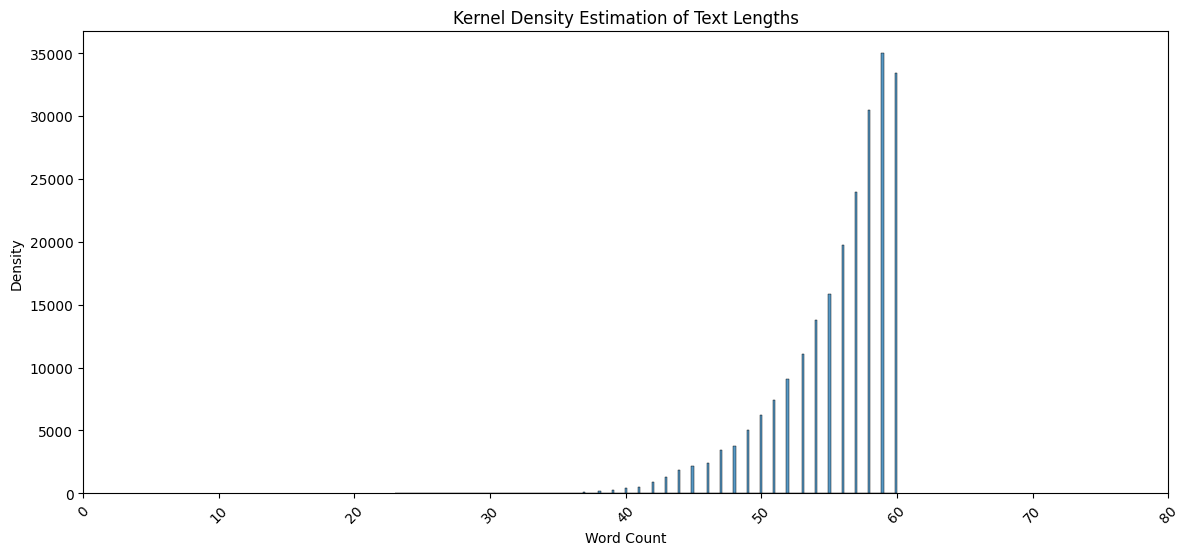

In [ ]:

# Set up a reasonable figure size
plt.figure(figsize=(14, 6))  # Adjust width and height as needed

# Plot hist using seaborn's kdeplot
sns.histplot(data=df['WordCount'], fill=True)

# Customizing plot labels and title
plt.title('Kernel Density Estimation of Text Lengths')
plt.xlabel('Word Count')
plt.ylabel('Density')

# Customizing x-axis ticks and rotation
plt.xlim(0, 80)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.show()

In [ ]:
df_filtered1 = df[df['WordCount'] >= 45]
df_filtered1.shape, df.shape

((222873, 6), (228671, 6))

In [ ]:
df_filtered1['category_grouped'].value_counts()

category_grouped
['entertainment']                                                     13582
['miscellaneous']                                                     11436
['science']                                                            9854
['sports']                                                             9434
['national']                                                           8620
                                                                      ...  
['business', 'sports', 'national']                                        3
['politics', 'world', 'business', 'Israel-Hamas_War']                     3
['world', 'miscellaneous', 'entertainment', 'national', 'fashion']        3
['ODI_World_Cup_2023', 'business', 'startup', 'technology']               2
['education', 'science']                                                  1
Name: count, Length: 663, dtype: int64

In [ ]:
df_filtered1.sample(5)

,Headline,Content,News Categories,Date,category_grouped,WordCount
163996,alia bhatt serves boss babe supremacy in blush...,on december alia bhatt attended an event in b...,"['entertainment', 'fashion']",2024-01-20,"['entertainment', 'fashion']",54
53228,erdoğan meets elon musk asks him to open tesla...,turkish president recep tayyip erdoğan met tes...,"['automobile', 'business', 'technology']",2023-10-16,"['automobile', 'business', 'technology']",59
55346,mysterious fairy circles spotted at new place...,mysterious fairy circles or round discs of bar...,['science'],2023-10-17,['science'],58
71592,baap of chart asked to refund ₹ crore in fees ...,sebi has asked mohammad nasiruddin ansari who ...,['business'],2023-10-30,['business'],60
142928,wrote jagjits tumko dekha toh yeh in minutes ...,javed akhtar revealed that he had penned the g...,['entertainment'],2024-01-01,['entertainment'],60


In [ ]:

category_names
len(category_names)

37

In [ ]:
def sample_rows_for_categories(df, category_names, n=10000):
    sampled_df = pd.DataFrame()

    for category_name in category_names:
        # Filter rows where 'category_name' is in the list of categories
        category_df = df[df['category_grouped'] == category_name]

        # Sample 9000 rows if available, otherwise sample all rows
        sampled_category_df = category_df.sample(min(n, len(category_df)), random_state=42)

        # Rename 'News Categories' to a single list value
        sampled_category_df['category_grouped'] = [category_name] * len(sampled_category_df)

        # Append sampled rows to sampled_df
        sampled_df = pd.concat([sampled_df, sampled_category_df])

    # Reset index of the final sampled DataFrame
    sampled_df.reset_index(drop=True, inplace=True)

    return sampled_df

# Sample 10000 rows for each category in 'category_names' and rename 'News Categories'
sampled_df1 = sample_rows_for_categories(df_filtered1, category_names)

# Display sampled DataFrame with renamed 'News Categories'
print("Sampled DataFrame for specified categories with renamed 'News Categories':")
sampled_df1.shape, df_filtered1.shape


Sampled DataFrame for specified categories with renamed 'News Categories':


((174869, 6), (222873, 6))

In [ ]:
sampled_df1.head(10)

,Headline,Content,News Categories,Date,category_grouped,WordCount
0,actor kiku sharda says he lost both parents in...,actorcomedian kiku sharda posted a picture of ...,['entertainment'],27-09-2023,['entertainment'],55
1,badshah pakistani actress hania aamirs pics g...,pakistani actress hania aamir recently shared ...,['entertainment'],2023-12-05,['entertainment'],52
2,dwayne johnson wears iconic s outfit as he wis...,wrestlerturnedactor dwayne johnson donned his ...,['entertainment'],2023-12-29,['entertainment'],51
3,never say never karan on working with kartik p...,when asked about collaborating with kartik aar...,['entertainment'],2023-10-31,['entertainment'],57
4,unfair to talk about our future on kwk without...,on the latest episode of koffee with karan kar...,['entertainment'],2023-12-16,['entertainment'],60
5,kaathal maker jeo to sue kerala college for ca...,malayalam director jeo baby said hell sue faro...,['entertainment'],2023-12-07,['entertainment'],59
6,hina khan hospitalised due to high fever says ...,actressformer bigg boss contestant hina khan s...,['entertainment'],2023-12-30,['entertainment'],59
7,had to forget of my vocabulary for the archie...,veteran lyricist javed akhtar revealed that he...,['entertainment'],2023-10-31,['entertainment'],58
8,liked animal but was scared to write about it ...,actress nimrat kaur said she liked animal in p...,['entertainment'],2023-12-25,['entertainment'],60
9,female home guard suspended for kissing zubeen...,a female home guard deployed at the chabua pol...,['entertainment'],2024-05-16,['entertainment'],58


In [ ]:
sampled_df1['category_grouped'].value_counts()


category_grouped
['entertainment']                           10000
['miscellaneous']                           10000
['science']                                  9854
['sports']                                   9434
['national']                                 8620
['business']                                 8560
['automobile', 'business']                   8224
['entertainment', 'fashion']                 7629
['politics']                                 7435
['world']                                    7004
['politics', 'national']                     6754
['education']                                6371
['startup']                                  6369
['technology']                               6319
['education', 'national']                    6180
['Health___Fitness']                         6151
['travel']                                   5788
['national', 'travel']                       4453
['fashion']                                  4089
['business', 'startup']          

In [ ]:
sampled_df1 = sampled_df1.sample(frac=1, random_state=42).reset_index(drop=True)
sampled_df1.head(5)

,Headline,Content,News Categories,Date,category_grouped,WordCount
0,shah rukh khan sports diamond brooch with allb...,shah rukh khan the badshah of bollywood contin...,['fashion'],2024-04-16,['fashion'],54
1,zaheer khan heaps praise on yashasvi jaiswal,former india pacer zaheer khan was all praise ...,['sports'],2024-03-08,['sports'],57
2,indiairan mens kabaddi final suspended as play...,the indiairan mens kabaddi final at th asian g...,"['sports', 'Asian_Games_2022']",08-10-2023,"['sports', 'Asian_Games_2022']",58
3,parineetis wedding outfit paid tribute to her ...,fashion designer manish malhotra while sharing...,"['entertainment', 'fashion']",2023-10-30,"['entertainment', 'fashion']",55
4,deepika padukone serves winter fashion goals a...,actress deepika padukone served winter fashion...,"['entertainment', 'fashion']",2024-02-08,"['entertainment', 'fashion']",59


In [ ]:
sampled_df1.drop('WordCount',axis=1,inplace=True)

In [ ]:
sampled_df1.head()

,Headline,Content,News Categories,Date,category_grouped
0,shah rukh khan sports diamond brooch with allb...,shah rukh khan the badshah of bollywood contin...,['fashion'],2024-04-16,['fashion']
1,zaheer khan heaps praise on yashasvi jaiswal,former india pacer zaheer khan was all praise ...,['sports'],2024-03-08,['sports']
2,indiairan mens kabaddi final suspended as play...,the indiairan mens kabaddi final at th asian g...,"['sports', 'Asian_Games_2022']",08-10-2023,"['sports', 'Asian_Games_2022']"
3,parineetis wedding outfit paid tribute to her ...,fashion designer manish malhotra while sharing...,"['entertainment', 'fashion']",2023-10-30,"['entertainment', 'fashion']"
4,deepika padukone serves winter fashion goals a...,actress deepika padukone served winter fashion...,"['entertainment', 'fashion']",2024-02-08,"['entertainment', 'fashion']"


In [ ]:
# Map categories to integers
category_mapping = {category: idx for idx, category in enumerate(sampled_df1['category_grouped'].unique())}
sampled_df1['category_grouped'] = sampled_df1['category_grouped'].map(category_mapping)
sampled_df1.head(), category_mapping


(                                            Headline  \
 0  shah rukh khan sports diamond brooch with allb...   
 1       zaheer khan heaps praise on yashasvi jaiswal   
 2  indiairan mens kabaddi final suspended as play...   
 3  parineetis wedding outfit paid tribute to her ...   
 4  deepika padukone serves winter fashion goals a...   
 
                                              Content  \
 0  shah rukh khan the badshah of bollywood contin...   
 1  former india pacer zaheer khan was all praise ...   
 2  the indiairan mens kabaddi final at th asian g...   
 3  fashion designer manish malhotra while sharing...   
 4  actress deepika padukone served winter fashion...   
 
                   News Categories        Date  category_grouped  
 0                     ['fashion']  2024-04-16                 0  
 1                      ['sports']  2024-03-08                 1  
 2  ['sports', 'Asian_Games_2022']  08-10-2023                 2  
 3    ['entertainment', 'fashion']  2023-10-

In [ ]:
#TOKENISATION

import nltk
nltk.download('punkt')
from nltk import word_tokenize , sent_tokenize

def tokenize_text(text):
    # Tokenize each sentence into words
    words_list = [word_tokenize(sentence) for sentence in sent_tokenize(text)]

    words = ' '.join(' '.join(words) for words in words_list)

    return words

sampled_df1["Content"] = sampled_df1["Content"].apply(tokenize_text)
sampled_df1["Headline"] = sampled_df1["Headline"].apply(tokenize_text)

sampled_df1.head()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,Headline,Content,News Categories,Date,category_grouped
0,shah rukh khan sports diamond brooch with allb...,shah rukh khan the badshah of bollywood contin...,['fashion'],2024-04-16,0
1,zaheer khan heaps praise on yashasvi jaiswal,former india pacer zaheer khan was all praise ...,['sports'],2024-03-08,1
2,indiairan mens kabaddi final suspended as play...,the indiairan mens kabaddi final at th asian g...,"['sports', 'Asian_Games_2022']",08-10-2023,2
3,parineetis wedding outfit paid tribute to her ...,fashion designer manish malhotra while sharing...,"['entertainment', 'fashion']",2023-10-30,3
4,deepika padukone serves winter fashion goals a...,actress deepika padukone served winter fashion...,"['entertainment', 'fashion']",2024-02-08,3


In [ ]:
#remove stopword
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words=set(stopwords.words('english'))

def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word not in stop_words]
    return " ".join(filtered_words)

sampled_df1["Content"]=sampled_df1["Content"].apply(lambda x: remove_stopwords(x))
sampled_df1["Headline"]=sampled_df1["Headline"].apply(lambda x: remove_stopwords(x))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
sampled_df1.head()

,Headline,Content,News Categories,Date,category_grouped
0,shah rukh khan sports diamond brooch allblack ...,shah rukh khan badshah bollywood continues sla...,['fashion'],2024-04-16,0
1,zaheer khan heaps praise yashasvi jaiswal,former india pacer zaheer khan praise yashasvi...,['sports'],2024-03-08,1
2,indiairan mens kabaddi final suspended players...,indiairan mens kabaddi final th asian games su...,"['sports', 'Asian_Games_2022']",08-10-2023,2
3,parineetis wedding outfit paid tribute grandmo...,fashion designer manish malhotra sharing detai...,"['entertainment', 'fashion']",2023-10-30,3
4,deepika padukone serves winter fashion goals f...,actress deepika padukone served winter fashion...,"['entertainment', 'fashion']",2024-02-08,3


In [ ]:
X =  sampled_df1['Headline'] + " " + sampled_df1['Content']
y = sampled_df1['category_grouped']

from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:

from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import CountVectorizer

# Create a pipeline with CountVectorizer and MultinomialNB
model = make_pipeline(CountVectorizer(), MultinomialNB())

In [ ]:
model.fit(X_train, y_train)

Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Predict on the test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.8734488477154457
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       771
           1       0.91      0.94      0.92      1919
           2       0.91      0.96      0.93       230
           3       0.98      1.00      0.99      1467
           4       0.84      0.91      0.87      1245
           5       0.77      0.85      0.81       457
           6       0.98      0.84      0.90       260
           7       0.64      0.75      0.69      1728
           8       0.99      0.98      0.98       442
           9       0.71      0.74      0.73      1308
          10       0.88      0.73      0.80       516
          11       0.85      0.79      0.82      1454
          12       0.87      0.91      0.89      1257
          13       0.93      0.95      0.94      1935
          14       0.94      0.94      0.94      1160
          15       0.78      0.87      0.83      1677
          16       0.81     

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

cv_scores = cross_val_score(model, X, y, cv=StratifiedKFold(n_splits=3, shuffle=True), scoring='accuracy')

print(f"Cross-Validation Scores:{cv_scores}")

print(f"Mean Accuracy: {np.mean(cv_scores):.2f}")

Cross-Validation Scores:[0.86429919 0.86610053 0.8619122 ]
Mean Accuracy: 0.86


In [ ]:


y_pred_best = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_best)

print(f"Best Model Accuracy: {accuracy:.3f}")

Best Model Accuracy: 0.873


In [ ]:
correct_predictions = sum(y_test == y_pred_best)
wrong_predictions = len(y_test) - correct_predictions
print(f'Correct Predictions: {correct_predictions}, Wrong Predictions: {wrong_predictions}')

Correct Predictions: 30548, Wrong Predictions: 4426


In [ ]:
y_pred_best

array([17, 15, 16, ..., 23, 14, 14])

In [ ]:
y_pred_best_classes = []
inverted_dict = {value: key for key, value in category_mapping.items()}

y_test_classes=[]
for label in y_test:
    y_test_classes.append(inverted_dict[label])

for label in y_pred_best:
    y_pred_best_classes.append(inverted_dict[label])

#final dataframe with text and predicted labels
final_df = pd.DataFrame({'Content': X_test, 'Predicted_Labels': y_pred_best_classes, 'Actual_Labels': y_test_classes})

final_df.head()

,Content,Predicted_Labels,Actual_Labels
135524,us doj expanding probe issuing subpoenas infor...,"['automobile', 'business']","['automobile', 'business']"
37119,gandhar oil refinery shares debut premium ipo ...,['business'],['business']
172810,centres open byjus reports closing tuition cen...,['startup'],['startup']
68695,boman irani reveals lost kg play mahatma gandh...,['entertainment'],['entertainment']
66392,taunted saying bachchan late set sanjay actor ...,['entertainment'],['entertainment']


In [ ]:
final_df.sample(10)

,Content,Predicted_Labels,Actual_Labels
116487,saturn ’ icy life may hold building blocks lif...,['science'],['science']
88228,yrold man tests positive nipah kerala tally ri...,"['national', 'Health___Fitness']","['national', 'Health___Fitness']"
97582,swiggy senior vp anuj rathi quits years anuj r...,['startup'],['startup']
149692,gaza human chess board un worker amid ongoing ...,"['world', 'Israel-Hamas_War']","['world', 'Israel-Hamas_War']"
154935,icc world cup schedule announced ind v pak jun...,['sports'],['sports']
102327,manish sisodia inaugurates south delhis ashram...,"['national', 'travel']","['national', 'travel']"
77629,ramadan oldest mosques world mosques soaring m...,['travel'],['travel']
14792,man claiming bomb climbs ft ferris wheel calif...,['world'],['world']
111623,heritage photographer captures lucknow ’ hidde...,['travel'],['travel']
86833,german woman killed lookalike fake death trial...,['national'],['world']


In [ ]:
inverted_dict

{0: "['fashion']",
 1: "['sports']",
 2: "['sports', 'Asian_Games_2022']",
 3: "['entertainment', 'fashion']",
 4: "['technology']",
 5: "['world', 'Israel-Hamas_War']",
 6: "['world', 'Health___Fitness']",
 7: "['national']",
 8: "['automobile', 'technology']",
 9: "['politics', 'national']",
 10: "['business', 'startup', 'technology']",
 11: "['world']",
 12: "['education']",
 13: "['entertainment']",
 14: "['travel']",
 15: "['business']",
 16: "['startup']",
 17: "['automobile', 'business']",
 18: "['business', 'technology']",
 19: "['science', 'Health___Fitness']",
 20: "['miscellaneous']",
 21: "['politics']",
 22: 'Other',
 23: "['automobile']",
 24: "['startup', 'technology']",
 25: "['national', 'travel']",
 26: "['Health___Fitness']",
 27: "['science']",
 28: "['national', 'Health___Fitness']",
 29: "['business', 'startup']",
 30: "['world', 'travel']",
 31: "['education', 'national']",
 32: "['sports', 'ODI_World_Cup_2023']",
 33: "['automobile', 'business', 'technology']",


In [ ]:
X_text = ["Tour a Classic Charleston risks of extreme heat Home That Includes a Hidden Pool and Full... I told him if you touch that baby he is gonna bite you PROTECTOR Wild Encounters Former Boston Fed President Eric Rosengren: Don't think we're down to China. The best rock album in music history is not by The Beatles, according to reports."]

def remove_punc(text):
    return text.translate(str.maketrans('', '',punc))

X_text = [remove_punc(text) for text in X_text]
# Predict directly using the fitted pipeline (best_model)
y_text = model.predict(X_text)

# Print the predicted label
print("Predicted Label:", inverted_dict[y_text[0]])

Predicted Label: ['world']


In [ ]:
import joblib
joblib_file = "/content/drive/MyDrive/Text_Classification_model.joblib"
joblib.dump(model, joblib_file)

['/content/drive/MyDrive/Text_Classification_model.joblib']